In [1]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
import math
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten,LeakyReLU
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [2]:
# Khởi tạo các giá trị của đầu công tác
data_robot2DoF =[]
L1 = 50
L2 = 40
L3 = 20
for theta1 in range(-45,45):
  for theta2 in range(-60,60):
    for theta3 in range(-45,45):
      Px = L1*np.cos(np.radians(theta1)) + L2*np.cos(np.radians(theta1 + theta2)) +L3*np.cos(np.radians(theta1 + theta2 +theta3))
      Py = L1*np.sin(np.radians(theta1)) + L2*np.sin(np.radians(theta1 + theta2)) +L3*np.sin(np.radians(theta1 + theta2+theta3))
      ci = theta1 + theta2 +theta3
      data_robot2DoF.append([theta1, theta2,theta3, Px ,Py,ci])
data = pd.DataFrame(data_robot2DoF, columns = ['theta1', 'theta2','theta3', 'Px','Py','ci'])
data

,theta1,theta2,theta3,Px,Py,ci
0,-45,-60,-45,7.682069,-83.992372,-150
1,-45,-60,-44,7.859231,-84.293134,-149
2,-45,-60,-43,8.041615,-84.590757,-148
3,-45,-60,-42,8.229166,-84.885153,-147
4,-45,-60,-41,8.421826,-85.176230,-146
...,...,...,...,...,...,...
971995,44,59,40,10.996238,85.744022,143
971996,44,59,41,10.788608,85.463426,144
971997,44,59,42,10.585907,85.179250,145
971998,44,59,43,10.388196,84.891579,146


In [3]:
X_P=data.drop(['theta1','theta2','theta3'],axis =1)
Y_Theta=data.drop(['Px','Py','ci'],axis =1)
print(X_P.shape,Y_Theta.shape)

(972000, 3) (972000, 3)


In [4]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
x_train, x_test, y_train, y_test = train_test_split(X_P, Y_Theta, test_size=0.2,random_state =7)


In [5]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((777600, 3), (194400, 3), (777600, 3), (194400, 3))

In [6]:
y_train.head(5)

,theta1,theta2,theta3
328125,-15,-15,30
452350,-4,46,-35
643452,14,9,-3
650311,15,-35,16
922685,40,-8,-40


In [7]:
x_train.head(5)

,Px,Py,ci
328125,102.937307,-32.940952,0
452350,99.454919,25.714787,7
643452,104.128833,34.565743,20
650311,105.835277,-2.134983,-4
922685,92.029507,50.552689,-8


In [8]:
# Tạo mạng neron nhân tạo

model = Sequential()
model.add(Dense(64,kernel_initializer='normal',activation='relu',input_shape=(3,)))
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 8,771
Trainable params: 8,771
Non-trainable params: 0
_________________________________________________________________


In [9]:
# model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
# history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

# opt = SGD(lr=0.001,momentum=0.1)
# model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])
# history=model.fit(x_train,x_train,batch_size=32,epochs=2,verbose=1,validation_data=(x_test,y_test))
# Huấn luyện mô hình 
model.compile(loss='mse',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])


Epoch 1/500
4860/4860 [==============================] - 10s 2ms/step - loss: 287.8130 - accuracy: 0.6576 - val_loss: 282.0930 - val_accuracy: 0.6682
Epoch 2/500
4860/4860 [==============================] - 9s 2ms/step - loss: 280.6816 - accuracy: 0.6674 - val_loss: 272.1362 - val_accuracy: 0.6834
Epoch 3/500
4860/4860 [==============================] - 9s 2ms/step - loss: 259.7668 - accuracy: 0.6994 - val_loss: 232.2891 - val_accuracy: 0.7312
Epoch 4/500
4860/4860 [==============================] - 9s 2ms/step - loss: 237.5209 - accuracy: 0.7231 - val_loss: 227.6393 - val_accuracy: 0.7498
Epoch 5/500
4860/4860 [==============================] - 9s 2ms/step - loss: 222.7893 - accuracy: 0.7391 - val_loss: 203.5843 - val_accuracy: 0.7731
Epoch 6/500
4860/4860 [==============================] - 9s 2ms/step - loss: 211.2993 - accuracy: 0.7514 - val_loss: 262.1403 - val_accuracy: 0.6845
Epoch 7/500
4860/4860 [==============================] - 10s 2ms/step - loss: 204.6060 - accuracy: 0.7589

In [10]:
# Lưu kết quả của model
from tensorflow.keras.models import load_model
model.save('huy3dof.h5')
load_model('huy3dof.h5')

In [11]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  173.39004516601562
Độ chính xác kiểm tra là:  0.7991254925727844


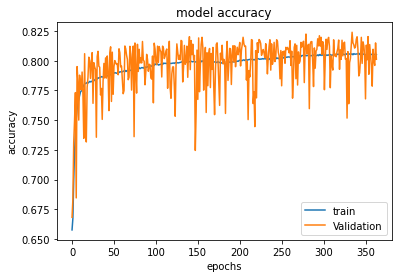

In [12]:
# Vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [14]:
test = np.array([[45,45,45],[90,90,60]])
y_predict = model.predict(test)
print(y_predict)

[[27.450132  17.08916   18.935036 ]
 [41.861683   9.755633   1.8120366]]
